In [1]:
import pandas as pd
import numpy as np
import spacy
from spacy import displacy
import networkx as nx

import matplotlib.pyplot as plt

In [2]:
relationship_df_filtrat2 = pd.read_csv("Data/date_filtrate_retea.csv")
relationship_df_filtrat2

,Unnamed: 0,source,target,value
0,4,Orange,Telekom Romania Mobile,22
1,6,Klaus Iohannis,Victor Costache,374
2,7,Ludovic Orban,Victor Costache,242
3,8,Raed Arafat,Violeta Alexandru,10
4,9,Klaus Iohannis,Violeta Alexandru,12
...,...,...,...,...
3507,4924,Digi24,Sebastian Burduja,2
3508,4925,Dan Carbunaru,Sebastian Burduja,2
3509,4926,Alexandru Rafila,Gandul,2
3510,4927,Click.ro,Fundatia Dan Voiculescu,2


In [3]:
# NetworkX

In [4]:
G = nx.from_pandas_edgelist(relationship_df_filtrat2, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value",
                            create_using = nx.Graph())

In [5]:
# Pyvis: 

In [6]:
from pyvis.network import Network
net = Network(notebook = True, cdn_resources='remote', width="1000px", height="700px", bgcolor='#222222', font_color='white',select_menu=True, filter_menu=True)

node_degree = dict(G.degree)

#Setting up node size attribute
nx.set_node_attributes(G, node_degree, 'size')
net.show_buttons(filter_=["physics"])
net.from_nx(G)
net.show("retea_facebook.html")

retea_facebook.html


In [7]:
degree_dict = nx.degree_centrality(G)


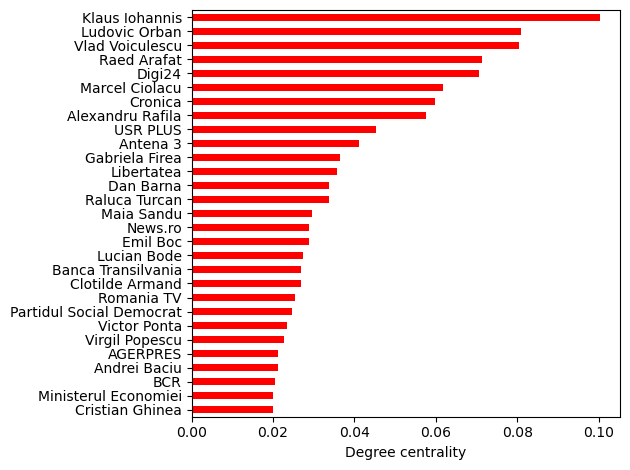

In [8]:


degree_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns=['Degree centrality'])

# Plot top 10 nodes
ax = degree_df.sort_values('Degree centrality', ascending=False)[0:29].plot(kind="barh", legend=False,color='red')
ax.set_xlabel("Degree centrality")
#ax.set_ylabel("Nodes")
#plt.title("Top 19 Nodes by Eigenvector Centrality")
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value on top
plt.tight_layout() 
plt.savefig('degree.png', transparent=True, bbox_inches='tight')
plt.show()

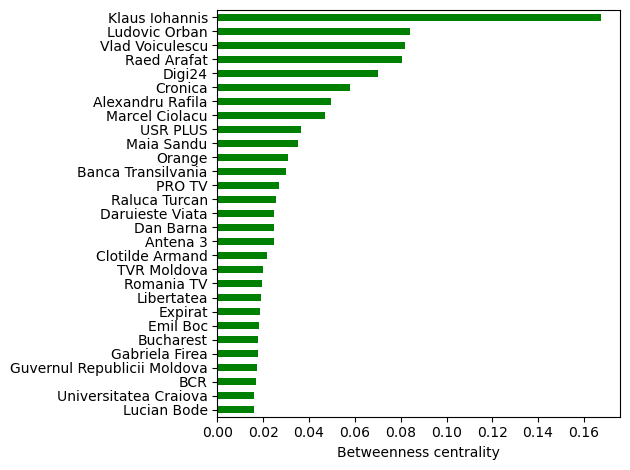

In [9]:
# Betweenness centrality
betweenness_dict = nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame.from_dict(betweenness_dict, orient='index', columns=['Betweenness centrality'])


# Plot top 10 nodes
ax = betweenness_df.sort_values('Betweenness centrality', ascending=False)[0:29].plot(kind="barh", legend=False,color='green')
ax.set_xlabel("Betweenness centrality")
#ax.set_ylabel("Nodes")
#plt.title("Top 19 Nodes by Eigenvector Centrality")
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value on top
plt.tight_layout() 
plt.savefig('between.png', transparent=True, bbox_inches='tight')
plt.show()

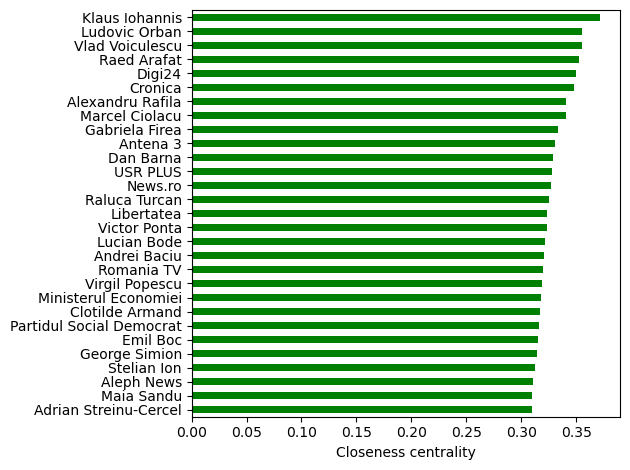

In [10]:
# Closeness centrality
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index', columns=['Closeness centrality'])

# Plot top 10 nodes
ax = closeness_df.sort_values('Closeness centrality', ascending=False)[0:29].plot(kind="barh", legend=False,color='green')
ax.set_xlabel("Closeness centrality")
#ax.set_ylabel("Nodes")
#plt.title("Top 19 Nodes by Eigenvector Centrality")
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value on top
plt.tight_layout() 
plt.savefig('Closeness.png', transparent=True, bbox_inches='tight')
plt.show()

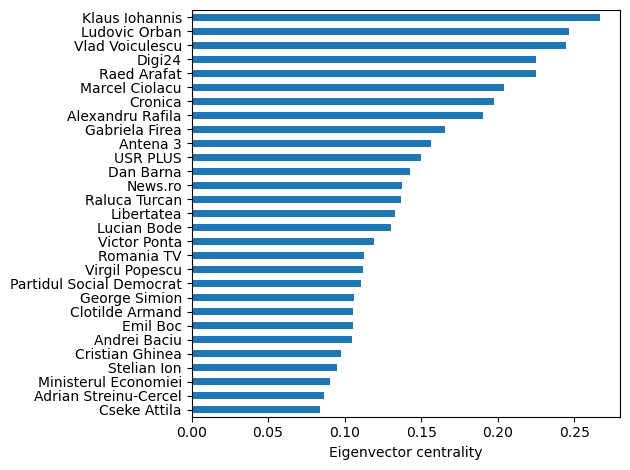

In [11]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt



# Calculate Eigenvector centrality
eigenvector_dict = nx.eigenvector_centrality(G)

eigenvector_df = pd.DataFrame.from_dict(eigenvector_dict, orient='index', columns=['Eigenvector centrality'])

# Plot top 10 nodes
ax = eigenvector_df.sort_values('Eigenvector centrality', ascending=False)[0:29].plot(kind="barh", legend=False)
ax.set_xlabel("Eigenvector centrality")
#ax.set_ylabel("Nodes")
#plt.title("Top 19 Nodes by Eigenvector Centrality")
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value on top
plt.tight_layout() 
plt.savefig('Eigenvector.png', transparent=True, bbox_inches='tight')
plt.show()
 

In [12]:
eigenvector_df.sort_values('Eigenvector centrality', ascending=False)[0:29]

,Eigenvector centrality
Klaus Iohannis,0.266627
Ludovic Orban,0.246840
Vlad Voiculescu,0.244773
Digi24,0.224974
Raed Arafat,0.224886
Marcel Ciolacu,0.204443
Cronica,0.197385
Alexandru Rafila,0.190613
Gabriela Firea,0.165847
Antena 3,0.156555


In [13]:
shortest_path = nx.shortest_path(G,"Parintele Calistrat","Digi24")
shortest_path

['Parintele Calistrat', 'Raed Arafat', 'Digi24']

In [14]:
best_connector = nx.betweenness_centrality(G)
for w in sorted(best_connector, key=best_connector.get, reverse=True):
    print(w, best_connector[w])

Klaus Iohannis 0.16738163578564408
Ludovic Orban 0.08401786093818173
Vlad Voiculescu 0.08173125630907645
Raed Arafat 0.08072807374641586
Digi24 0.07026818431370889
Cronica 0.05770229175054258
Alexandru Rafila 0.049506403923223176
Marcel Ciolacu 0.046787264581110044
USR PLUS 0.03654061235050053
Maia Sandu 0.03516789651828316
Orange 0.030973546082238727
Banca Transilvania 0.02971864355633515
PRO TV 0.02667588536035156
Raluca Turcan 0.025472446078202496
Daruieste Viata 0.024716719076069527
Dan Barna 0.024576195588050097
Antena 3 0.024508391346316192
Clotilde Armand 0.02173523724781104
TVR Moldova 0.019997358175173945
Romania TV 0.019577908865929385
Libertatea 0.01906845270268429
Expirat 0.018768449676985037
Emil Boc 0.018192740902083282
Bucharest 0.017809876650497096
Gabriela Firea 0.017689440346769204
Guvernul Republicii Moldova 0.01710190542230849
BCR 0.016967383204017413
Universitatea Craiova 0.01595952660985224
Lucian Bode 0.015873507787412283
Victor Ponta 0.015729576398107795
Virgil 

In [15]:
page_rank = nx.pagerank(G)
page_rank

{'Orange': 0.0031978666508739816,
 'Telekom Romania Mobile': 0.0009149918334902394,
 'Klaus Iohannis': 0.015313623651060865,
 'Victor Costache': 0.0022671114064604972,
 'Ludovic Orban': 0.012019619058265736,
 'Raed Arafat': 0.010958740543334513,
 'Violeta Alexandru': 0.0021920819035587302,
 'Radauti': 0.00247659413601216,
 'Via Transilvanica': 0.0005558981883008683,
 'Rogob': 0.000977602260297092,
 'Victoriabank': 0.000540005454213594,
 'Tucano Coffee': 0.000540005454213594,
 'Casa Share': 0.0001950104991474884,
 'Mihai Chirica': 0.002493505259248015,
 'Peluza Nord Craiova': 0.0003349391829184909,
 'Universitatea Craiova': 0.002850991660835051,
 'Dacia': 0.0006771306271133497,
 'Renault': 0.0008744799668810564,
 'Banca Transilvania': 0.004862605017882692,
 'OMV Petrom': 0.002411781873447844,
 'Cristina Iurisniti': 0.0006121244449100719,
 'George Marussi': 0.0002983292087028894,
 'Iulian Bulai': 0.0011837241831496655,
 'Vlad Alexandrescu': 0.0004917062107496786,
 'Cristian Ghica': 0.000

In [16]:
sorted(page_rank.items(), key=lambda x:x[1], reverse=True)[0:20]

[('Klaus Iohannis', 0.015313623651060865),
 ('Ludovic Orban', 0.012019619058265736),
 ('Vlad Voiculescu', 0.01166795390691476),
 ('Raed Arafat', 0.010958740543334513),
 ('Digi24', 0.01026124453485087),
 ('Marcel Ciolacu', 0.008782173285935151),
 ('Alexandru Rafila', 0.008530636157217506),
 ('Cronica', 0.008318191854861977),
 ('USR PLUS', 0.006842231715103782),
 ('Antena 3', 0.005842047873178144),
 ('Libertatea', 0.005099745740500651),
 ('Raluca Turcan', 0.004993713449121766),
 ('Dan Barna', 0.004970393767016395),
 ('Gabriela Firea', 0.004962548248946942),
 ('Banca Transilvania', 0.004862605017882692),
 ('Maia Sandu', 0.004600996664680925),
 ('Emil Boc', 0.004288492612696467),
 ('Clotilde Armand', 0.0041173785640391),
 ('Lucian Bode', 0.00399812435298262),
 ('Expirat', 0.003983892866252101)]

In [19]:
# Import necessary modules
from itertools import combinations
from collections import defaultdict
# Initialize the defaultdict: recommended
recommended = defaultdict(int)
# Iterate over all the nodes in G
for n, d in G.nodes(data = True):
# Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):
    # Check whether n1 and n2 do not have an edge
        if not G.has_edge(n1, n2):
        # Increment recommended
            recommended[(n1, n2)] += 1
# Identify the top 10 pairs of users
all_counts = sorted(recommended.values())
top10_pairs = [pair for pair, count in recommended.items() if count > all_counts[-10]]
print(top10_pairs)

[('Ludovic Orban', 'Mihai Chirica'), ('Ludovic Orban', 'Cseke Attila'), ('Libertatea', 'Vlad Voiculescu'), ('Raed Arafat', 'Emil Boc'), ('Cronica', 'Antena 3'), ('Cronica', 'George Simion')]


In [20]:
!pip install python-louvain

     ---------------------------------------- 0.0/204.6 kB ? eta -:--:--
     -- ------------------------------------- 10.2/204.6 kB ? eta -:--:--
     -- ------------------------------------- 10.2/204.6 kB ? eta -:--:--
     -- ------------------------------------- 10.2/204.6 kB ? eta -:--:--
     -- ------------------------------------- 10.2/204.6 kB ? eta -:--:--
     ----- ------------------------------- 30.7/204.6 kB 119.1 kB/s eta 0:00:02
     ------- ----------------------------- 41.0/204.6 kB 130.7 kB/s eta 0:00:02
     ----------- ------------------------- 61.4/204.6 kB 181.6 kB/s eta 0:00:01
     ----------------------- ------------ 133.1/204.6 kB 357.2 kB/s eta 0:00:01
     ---------------------------------- - 194.6/204.6 kB 512.0 kB/s eta 0:00:01
     ---------------------------------- - 194.6/204.6 kB 512.0 kB/s eta 0:00:01
     ---------------------------------- - 194.6/204.6 kB 512.0 kB/s eta 0:00:01
     ---------------------------------- - 194.6/204.6 kB 512.0 kB/s eta

In [21]:
from community import community_louvain

In [22]:
import community as community_louvain

In [23]:
communities = community_louvain.best_partition(G)
communities

{'Orange': 9,
 'Telekom Romania Mobile': 1,
 'Klaus Iohannis': 2,
 'Victor Costache': 1,
 'Ludovic Orban': 3,
 'Raed Arafat': 1,
 'Violeta Alexandru': 3,
 'Radauti': 4,
 'Via Transilvanica': 5,
 'Rogob': 6,
 'Victoriabank': 6,
 'Tucano Coffee': 6,
 'Casa Share': 7,
 'Mihai Chirica': 7,
 'Peluza Nord Craiova': 8,
 'Universitatea Craiova': 8,
 'Dacia': 3,
 'Renault': 3,
 'Banca Transilvania': 9,
 'OMV Petrom': 9,
 'Cristina Iurisniti': 7,
 'George Marussi': 7,
 'Iulian Bulai': 2,
 'Vlad Alexandrescu': 2,
 'Cristian Ghica': 2,
 'Bogdan Rodeanu': 2,
 'Daniel Popescu': 2,
 'Radu Mihail': 2,
 'Dan Barna': 3,
 'Click.ro': 10,
 'Dana Rogoz': 10,
 'Autonom': 9,
 'Spitalul Clinic Colentina': 1,
 'Pago': 9,
 'SmartBill Romania': 11,
 'COTNARI': 11,
 'Mastercard': 9,
 'Andrei Carabelea': 9,
 'Daniel Ciungu': 9,
 'TeraPlast': 9,
 'Andra': 10,
 'Asociatia pentru Relatii Comunitare': 9,
 'TIFF': 12,
 'Electric Castle': 12,
 'Jazz in the Park': 12,
 'Agent Green': 9,
 'Costel Alexe': 7,
 'Catalin Tolo

In [24]:
nx.set_node_attributes(G, communities, 'group')

In [25]:
com_net = Network(notebook = True, cdn_resources='remote', width="1000px", height="700px", bgcolor='#222222', font_color='white',select_menu=True, filter_menu=True )
com_net.from_nx(G)
com_net.show("retea_communitati.html")

retea_communitati.html
